<a href="https://www.kaggle.com/code/behnambaloochy/spaceship-titanic?scriptVersionId=140641459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

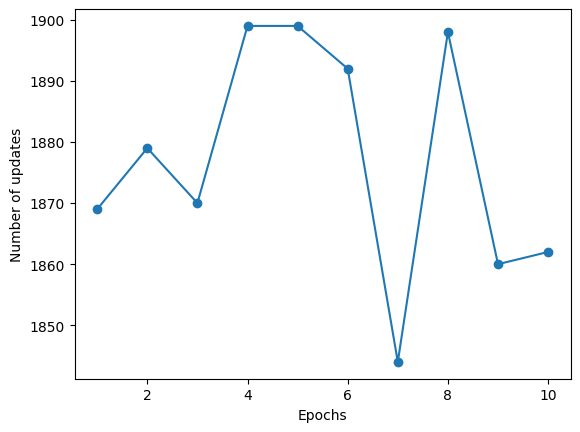

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
# Training Data Preprocessing
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', header=None, encoding='utf-8')
df = df.dropna(how="any")
# print(df.head(10))

y = df.iloc[1:, 13].values
y = np.where(y == 'True', 1, 0)
# print(y)

X = df.iloc[1:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X[:,0] = np.where(X[:,0] == 'True', 1, 0)
X[:,2] = np.where(X[:,2] == 'True', 1, 0)
X = np.float_(X)
# print(X)

# Perceptron Machine Learning
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Test Data Preprocessing
df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', encoding='utf-8')
df = df.dropna(how="any")
# print(df)
X = df.iloc[0:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X[:,0] = np.where(X[:,0] == 'True', 1, 0)
X[:,2] = np.where(X[:,2] == 'True', 1, 0)
X = np.float_(X)
# print(X)
# Perceptron Prediction
result = ppn.predict(X)
# print(result)
trans = []
for i in result:
    trans.append(i==1)
submission = np.column_stack((df.PassengerId, trans))
# print(submission)

df1 = pd.DataFrame(submission)
df1.to_csv("/kaggle/working/submission.csv", header=['PassengerId', 'Transported'], index=False)
